# Analyzing the dataset named Tips

In [2]:
import pandas as pd 
import seaborn as sns

# A. Data Exploration using Pandas:

In [20]:
#Load the tips dataset using Seaborn’s sns.load_dataset('tips') method.
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df = sns.load_dataset('tips')

In [22]:
#find top 5 values of dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
#check null values and data types in data types of each column
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [24]:
# describe for numerical columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


find

In [8]:
unique_days = df['day'].nunique()
print("Total number of unique days: ", unique_days)

Total number of unique days:  4


In [9]:
average_tips_by_gender = df.groupby('sex')['tip'].mean()
print("Average tip by gender:",average_tips_by_gender)

Average tip by gender: sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


C:\Users\91639\AppData\Local\Temp\ipykernel_13388\953141609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tips_by_gender = df.groupby('sex')['tip'].mean()


In [16]:
highest_bill = df.groupby('day')['total_bill'].sum().idxmax()
print("The day with the highest total bill collection is :", highest_bill)

The day with the highest total bill collection is : Sat


C:\Users\91639\AppData\Local\Temp\ipykernel_13388\1449906554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_bill = df.groupby('day')['total_bill'].sum().idxmax()


In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of Total Bill')

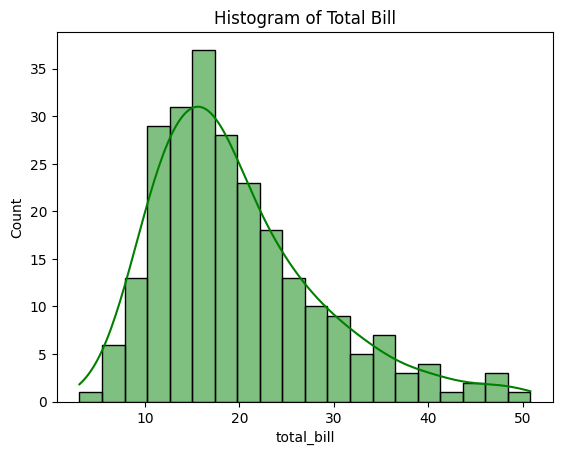

In [25]:
#create a histogram of the total bill column
sns.histplot(df['total_bill'], kde=True, bins=20,color='g')
plt.title('Histogram of Total Bill')

Text(0.5, 1.0, 'Boxplot of Tip Amounts by Day')

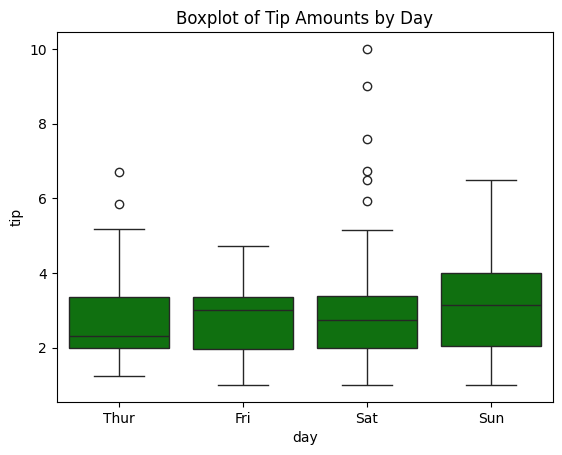

In [26]:
# boxplot showing the distribution of tip amount of each day
sns.boxplot(x='day', y='tip', data=df,color='g')
plt.title('Boxplot of Tip Amounts by Day')

C:\Users\91639\AppData\Local\Temp\ipykernel_13388\2078015580.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Violin Plot of Tip Distribution by Sex')

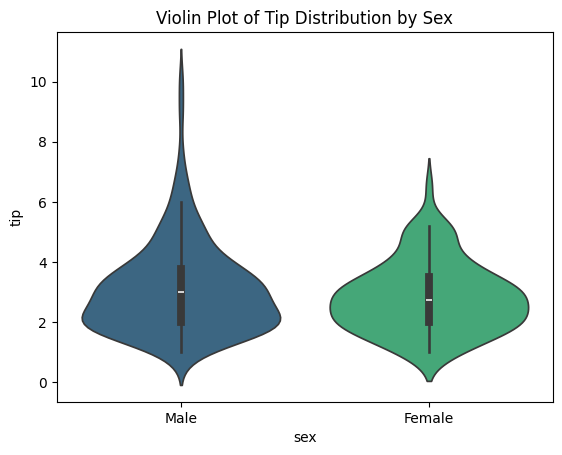

In [27]:
# Violin plot to compare tip distribution of tip amounts of each day
sns.violinplot(x='sex', y='tip', data=df,palette='viridis')
plt.title('Violin Plot of Tip Distribution by Sex')

Text(0.5, 1.0, 'Scatter Plot of Total Bill vs Tip, Colored by Sex')

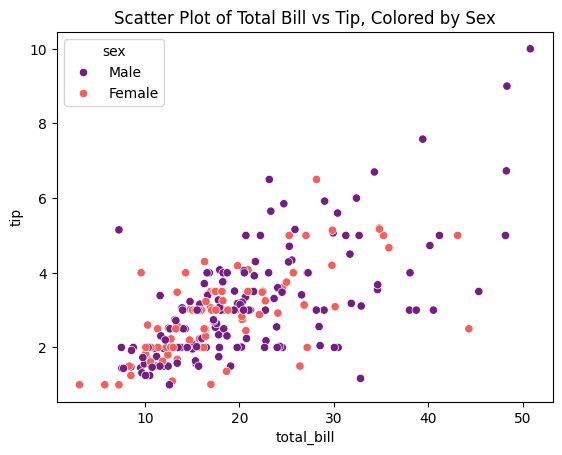

In [ ]:
#
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df,palette='magma')
plt.title('Scatter Plot of Total Bill vs Tip, Colored by Sex')

### C. Interactive Visualization using Plotly:

In [15]:
import plotly.express as px

Create an interactive bar chart showing average tip by day.

In [17]:
average_tip_by_day = df.groupby('day', as_index=False)['tip'].mean()
fig = px.bar(average_tip_by_day, x='day', y='tip', title='Average Tip by Day',
              labels={'tip': 'Average Tip', 'day': 'Day'},template='plotly_dark',color='tip', 
              color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

C:\Users\91639\AppData\Local\Temp\ipykernel_13388\1440308650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tip_by_day = df.groupby('day', as_index=False)['tip'].mean()


Create an interactive scatter plot of total_bill vs tip using Plotly Express, with:

- Color representing sex

- Size representing size (number of people)

In [18]:
fig = px.scatter(df,x='total_bill',y='tip',color='sex',size='size',title='Interactive Scatter Plot of Total Bill vs Tip',
                 labels={'total_bill': 'Total Bill', 'tip': 'Tip'},hover_data=['day'],template='plotly_dark')
fig.show()

Create an interactive pie chart of the proportion of smokers vs non-smokers.


In [19]:
smoker_counts = df['smoker'].value_counts().reset_index()
smoker_counts.columns = ['smoker', 'count']
fig = px.pie(smoker_counts, values='count', names='smoker', title='Proportion of Smokers vs Non-Smokers',template='plotly_dark')
fig.show()